# 数据基本信息

In [1]:
import pandas as pd

In [2]:
content = pd.read_csv('D:/Code/Pycharm/Data_source/sqlResult_1558435.csv',encoding='gb18030')

In [3]:
len(content)

89611

In [4]:
content.columns

Index(['id', 'author', 'source', 'content', 'feature', 'title', 'url'], dtype='object')

In [5]:
content.head()

id      author                  source  \
0  89617         NaN  快科技@http://www.kkj.cn/   
1  89616         NaN  快科技@http://www.kkj.cn/   
2  89615         NaN  快科技@http://www.kkj.cn/   
3  89614         NaN                     新华社   
4  89613  胡淑丽_MN7479                   深圳大件事   

                                             content  \
0  此外，自本周（6月12日）起，除小米手机6等15款机型外，其余机型已暂停更新发布（含开发版/...   
1  骁龙835作为唯一通过Windows 10桌面平台认证的ARM处理器，高通强调，不会因为只考...   
2  此前的一加3T搭载的是3400mAh电池，DashCharge快充规格为5V/4A。\r\n...   
3    这是6月18日在葡萄牙中部大佩德罗冈地区拍摄的被森林大火烧毁的汽车。新华社记者张立云摄\r\n   
4  （原标题：44岁女子跑深圳约会网友被拒，暴雨中裸身奔走……）\r\n@深圳交警微博称：昨日清...   

                                             feature  \
0  {"type":"科技","site":"cnbeta","commentNum":"37"...   
1  {"type":"科技","site":"cnbeta","commentNum":"15"...   
2  {"type":"科技","site":"cnbeta","commentNum":"18"...   
3  {"type":"国际新闻","site":"环球","commentNum":"0","j...   
4  {"type":"新闻","site":"网易热门","commentNum":"978",...   

                           title  \
0           小米MIUI 9首批机型曝光：共计15款   
1     骁龙835在Windows 10上的性能表现有望改善   
2      一加手机5细节曝光：3300mAh、充半小时用1天   
3  葡森林火灾造成至少62人死亡 政府宣布进入紧急状态（组图）   
4       44岁女子约网友被拒暴雨中裸奔 交警为其披衣相随   

                                                 url  
0     http://www.cnbeta.com/articles/tech/623597.htm  
1     http://www.cnbeta.com/articles/tech/623599.htm  
2     http://www.cnbeta.com/articles/tech/623601.htm  
3  http://world.huanqiu.com/hot/2017-06/10866126....  
4  http://news.163.com/17/0618/00/CN617P3Q0001875...

In [6]:
xinhua_data = []
for i in range(len(content)):
    xinhua_data.append(1 if '新华' in str(content.iloc[i].source) else 0)
    xinhua_data.count(1)

# 文本自动聚类（新华社文章）

### 停用词

In [7]:
def get_stopwords(filename = "D:/Code/Pycharm/Data_source/chinese_stopwords.txt"):
    stopwords_dic = open(filename, encoding= 'utf-8')
    stopwords = stopwords_dic.readlines()
    stopwords = [w.strip() for w in stopwords]
    stopwords_dic.close()
    print(stopwords)
    stopwords.append('\r\n')
    return stopwords

In [8]:
stopwords = get_stopwords()

['，', '的', '。', '、', '在', '了', '是', '', '“', '”', '和', '年', '月', '：', '也', '）', '为', '（', '有', '%', '日', '将', '中', '-', '到', '与', '对', ':', '', '上', '都', '等', '不', '他', '》', '《', '就', '但', '我', '而', '这', '会', '并', '；', '被', '后', '人', '从', '还', '1', '3', '6', '以', '新', '说', '7', '2', '要', '5', '？', '更', '于', '个', '10', '大', '时', '4', '多', '/', '让', '其', ')', '(', '很', '及', '下', '', '能', '—', '或', '该', '她', '比', '8', '元', '12', '已', '向', '做', '来', '前', '由', '好', '.', '称', '给', '最', '11', '·', '据', '着', '又', '至', '9', '20', '！', '[', ']', '去', '可', '把', '则', '', '一', '地', '高', '吗', '30', '所', '分', '较', '内', '第', '里', '占', '过', '15', '曾', '"', '再', '人民日报', '新闻网', '它', '况', '而且', '而是', '而外', '而言', '而已', '尔后', '反过来', '反过来说', '反之', '非但', '非徒', '否则', '嘎', '嘎登', '该', '赶', '个', '各', '各个', '各位', '各种', '各自', '给', '根据', '跟', '故', '故此', '固然', '关于', '管', '归', '果然', '果真', '过', '哈', '哈哈', '呵', '和', '何', '何处', '何况', '何时', '嘿', '哼', '哼唷', '呼哧', '乎', '哗', '还是', '还有', '换句话说', '换言之', '或', '或是', '或者', '极了', 

### 准备数据

In [9]:
import jieba

In [10]:
def cut(string): return list(jieba.cut(string))

In [11]:
def clean(words):
    clean_words = []
    for word in words:
        if not word.isdigit() and word not in stopwords and 1<len(word)<5:
            clean_words.append(word)
    return clean_words

In [12]:
train_data_list = []
data_id = []
for i in range(len(content)):
    if '新华' in str(content.iloc[i].source):
        train_data_list.append(" ".join(clean(cut(str(content.iloc[i].content)))))
        data_id.append(i)

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\Anan\AppData\Local\Temp\jieba.cache
Loading model cost 0.664 seconds.
Prefix dict has been built succesfully.


### 建立TFIDF向量

In [13]:
from sklearn import feature_extraction
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer 

In [14]:
count_v1 = CountVectorizer(max_df=0.4, max_features=3000) # 考虑到内存只选用了3000个特征
counts_train = count_v1.fit_transform(train_data_list)
print("the shape of train is " + repr(counts_train.shape))
tfidftransformer = TfidfTransformer()
tfidf_train = tfidftransformer.fit(counts_train).transform(counts_train)
tfidf_ndarray = tfidf_train.toarray() 

the shape of train is (78855, 3000)


### 用K-Means聚类

In [15]:
from sklearn.cluster import KMeans

In [16]:
kmeans = KMeans(n_clusters=10, random_state=0).fit(tfidf_ndarray)
label = kmeans.labels_

### 建立 id==>kinds 和 kind==>ids 映射

In [17]:
id_kinds = {text_id: kind_id for text_id, kind_id in zip(data_id,kmeans.labels_)}

In [18]:
id_kinds[3]

6

In [19]:
from collections import defaultdict
kind_ids = {}
kind_ids = defaultdict(lambda: set())
for text_id, kind_id in id_kinds.items():kind_ids[kind_id].add(text_id)

In [20]:
kind_ids[1]

{16388,
 83040,
 83041,
 24588,
 40977,
 40978,
 81937,
 40980,
 40981,
 40982,
 40983,
 40984,
 40985,
 40987,
 81951,
 81952,
 81953,
 81954,
 81956,
 16421,
 16422,
 81957,
 81958,
 81959,
 81960,
 16427,
 81961,
 37458,
 81962,
 37459,
 81971,
 81972,
 81973,
 81974,
 37460,
 81975,
 81976,
 81977,
 81978,
 24637,
 24638,
 24639,
 24640,
 24641,
 24642,
 81984,
 81986,
 81987,
 73798,
 73799,
 73800,
 73801,
 73802,
 73803,
 81988,
 73805,
 73806,
 73807,
 73808,
 73809,
 73810,
 49236,
 16470,
 73814,
 73815,
 73816,
 73817,
 73819,
 82012,
 73821,
 73822,
 73823,
 73824,
 16485,
 16487,
 16488,
 24684,
 73843,
 73844,
 73849,
 73850,
 73851,
 16508,
 73852,
 73853,
 73854,
 73855,
 73857,
 73858,
 73859,
 73860,
 16517,
 16518,
 16519,
 16520,
 16521,
 70041,
 73861,
 16524,
 73863,
 73864,
 70042,
 73865,
 73866,
 73867,
 73868,
 70043,
 73869,
 73870,
 73871,
 73872,
 73873,
 73874,
 73876,
 84698,
 84699,
 73889,
 57513,
 84705,
 57535,
 84706,
 84707,
 53772,
 84709,
 84710,


In [21]:
for i in range(10):
    print(len(kind_ids[i]))

5288
3743
3734
846
11686
3044
42703
2202
965
4644


### 词云展示聚类结果

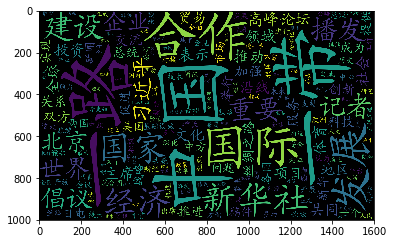

In [55]:
select_kind = kind_ids[2]

from collections import Counter
kind_words_counter = [Counter(clean(cut(str(content.iloc[num].content)))) for num in list(select_kind)]
kind_all_word = kind_words_counter[0] 
for i in range(1,len(select_kind)):kind_all_word += kind_words_counter[i] 
cloud_data = ''
for num in list(select_kind):
    cloud_data = cloud_data + ' ' + (" ".join(clean(cut(str(content.iloc[num].content)))))
    
import wordcloud 
wc = wordcloud.WordCloud(font_path=r'C:\Users\Anan\Downloads/simkai.ttf',
                         stopwords='新华社', width=800, height=500, scale=2, 
                         max_words=200, background_color='black')
#word_cloud = wc.generate_from_text(cloud_data)
word_cloud = wc.generate_from_frequencies(kind_all_word)

import matplotlib.pyplot as plt
plt.imshow(word_cloud)


# 文本分类（判断是否为新华社所发）

### 数据打标签

In [23]:
data_list = []
class_list = []
for i in range(len(content)):
    data_list.append(" ".join(clean(cut(str(content.iloc[i].content)))))
    class_list.append(1 if '新华' in str(content.iloc[i].source) else 0)

### 随机选取训练数据和测试数据

In [24]:
import random

In [25]:
test_size = 0.2    
data_index = [i for i in range(len(content))]    
data_class_list = list(zip(data_list, class_list, data_index))
random.shuffle(data_class_list)
index = int(len(data_class_list)*test_size) + 1
train_list = data_class_list[index:]
test_list = data_class_list[:index]
train_data_list, train_class_list, train_index_list = zip(*train_list)
test_data_list, test_class_list, test_index_list = zip(*test_list)

### 建立TFIDF向量

In [26]:
count_clf = CountVectorizer(max_df=0.5)
counts_train = count_clf.fit_transform(train_data_list)

count_v2 = CountVectorizer(vocabulary=count_clf.vocabulary_)
counts_test = count_v2.fit_transform(test_data_list)

tfidftransformer = TfidfTransformer()

tfidf_train = tfidftransformer.fit(counts_train).transform(counts_train)
tfidf_test = tfidftransformer.fit(counts_test).transform(counts_test)
print("the shape of tfidf_train is " + repr(tfidf_train.shape))
print("the shape of tfidf_test test is " + repr(tfidf_test.shape))

the shape of tfidf_train is (71688, 207843)
the shape of tfidf_test test is (17923, 207843)


### 使用朴素贝叶斯分类器

In [27]:
import pickle

In [28]:
def NBClassifier(train_feature, train_label, test_feature):
    from sklearn.naive_bayes import MultinomialNB
    nbclf = MultinomialNB().fit(train_feature, train_label)
    filename = 'finalized_nbclf.sav'
    pickle.dump(nbclf, open(filename, 'wb')) 
    pred = nbclf.predict(test_feature)
    return pred

### 性能评估

In [31]:
from sklearn import metrics

In [32]:
def calculate_result(actual,pred):
    m_accuracy = metrics.accuracy_score(actual, pred)
    m_precision = metrics.precision_score(actual,pred)
    m_recall = metrics.recall_score(actual,pred)
    print('predict info:')
    print('accuracy:{0:.3f}'.format(m_accuracy))
    print('precision:{0:.3f}'.format(m_precision))
    print('recall:{0:0.3f}'.format(m_recall))
    print('f1-score:{0:.3f}'.format(metrics.f1_score(actual,pred)))

### 结果显示

In [33]:
pred = NBClassifier(tfidf_train, train_class_list, tfidf_test) 
print('*************************\nNaiveBayes\n*************************')
calculate_result(test_class_list, pred)

*************************
NaiveBayes
*************************
predict info:
accuracy:0.917
precision:0.914
recall:1.000
f1-score:0.955


### 找出可能抄袭的文章

In [34]:
import numpy as np

In [35]:
result = []
result = [test_index_list[i] for i in range(len(pred)) if list(pred)[i]==1 and list(test_class_list)[i]!=1]
np.save('result.npy', result)
result

[3031,
 970,
 3554,
 5356,
 4183,
 10960,
 4205,
 5922,
 2204,
 5583,
 2257,
 1647,
 3160,
 4419,
 6427,
 5976,
 5497,
 3324,
 4221,
 4336,
 2742,
 6878,
 3587,
 6640,
 3724,
 614,
 1714,
 4299,
 1050,
 5688,
 4994,
 5009,
 5894,
 3337,
 10964,
 1771,
 10043,
 10971,
 7379,
 1048,
 783,
 8000,
 5390,
 5428,
 443,
 6314,
 3869,
 1051,
 4755,
 806,
 4033,
 7994,
 6894,
 5170,
 10741,
 2826,
 6088,
 2756,
 7918,
 6813,
 4379,
 682,
 6059,
 6892,
 1202,
 1458,
 1863,
 4634,
 7605,
 6062,
 7565,
 2861,
 5703,
 7415,
 6656,
 7683,
 7048,
 7055,
 6159,
 6898,
 7079,
 2865,
 3222,
 3335,
 7996,
 10583,
 6726,
 6163,
 7664,
 2366,
 480,
 2856,
 3740,
 7636,
 5851,
 2902,
 3323,
 1023,
 7579,
 9109,
 9979,
 221,
 3960,
 3423,
 6636,
 7110,
 68,
 6,
 10636,
 3301,
 805,
 3399,
 859,
 3084,
 515,
 173,
 1683,
 9878,
 4504,
 3842,
 2499,
 2818,
 2726,
 194,
 9863,
 8057,
 2408,
 4283,
 4528,
 3860,
 7328,
 819,
 3602,
 7783,
 6947,
 4959,
 1479,
 7488,
 7211,
 1969,
 4835,
 6691,
 7544,
 5866,
 349

In [36]:
len(result)

1479

# 抄袭判定（利用余弦距离计算相似性）

In [37]:
def CosineDistance(x,y):
    result = np.dot(x,y)/(np.linalg.norm(x)*np.linalg.norm(y))
    return result

### 准备数据

In [38]:
test_data_list = []
for i in result:
    test_data_list.append( " ".join(clean(cut(str(content.iloc[i].content)))))
count_v2 = CountVectorizer(vocabulary=count_v1.vocabulary_)
counts_test = count_v2.fit_transform(test_data_list)
tfidf_test = tfidftransformer.fit(counts_test).transform(counts_test)
test_ndarray = tfidf_test.toarray()
print("the shape of tfidf_test is " + repr(tfidf_test.shape))

the shape of tfidf_test is (1479, 3000)


### 计算余弦距离

In [39]:
Distance = []
for i in range(len(result)):
    distance_for_one = []
    for k in range(len(tfidf_ndarray)):
        distance_for_one.append(CosineDistance(test_ndarray[i][:],tfidf_ndarray[k][:]))
    Distance.append([max(distance_for_one),result[i],data_id[distance_for_one.index(max(distance_for_one))]])

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in double_scalars
  


### 观察结果

In [40]:
Distance[1:10]

[[0.6494384882555035, 970, 11195],
 [0.5733220400657106, 3554, 87171],
 [0.39922290906550567, 5356, 816],
 [0.43151980935653134, 4183, 49637],
 [0.29234808464247675, 10960, 44527],
 [0.3418259037335308, 4205, 77091],
 [0.42617012704034163, 5922, 11647],
 [0.6053822503822367, 2204, 70773],
 [0.3907711306469972, 5583, 34016]]

### 确定阈值 选出相似性较高的样本

In [41]:
[element for element in Distance if element[0] > 0.6]

[[0.6494384882555035, 970, 11195],
 [0.6053822503822367, 2204, 70773],
 [0.6840092672418868, 1647, 80129],
 [0.7517655210783512, 4336, 42684],
 [0.7431984858582031, 2742, 70855],
 [0.8723397885775069, 4299, 41565],
 [0.6863448253959228, 3337, 13792],
 [0.6948898542065315, 10971, 75478],
 [0.6468489977022723, 1048, 80858],
 [0.7979725661626185, 8000, 19414],
 [0.6877479392918336, 5428, 541],
 [0.631429454935902, 3869, 28519],
 [0.8129036122745658, 4755, 66836],
 [0.6453115754093014, 4033, 80869],
 [0.6291639954282499, 5170, 44158],
 [0.6774153187689418, 10741, 8991],
 [0.7354875024159239, 7918, 25459],
 [0.6179792881245476, 6813, 15124],
 [0.7046266969599624, 682, 51],
 [0.8507016931589486, 6892, 36987],
 [0.8027251832221713, 5703, 1113],
 [0.7504267657574857, 6656, 47917],
 [0.6775526135088602, 7055, 43135],
 [0.6098757094147044, 2865, 57539],
 [0.7018792904451244, 7996, 69726],
 [0.6145334156329757, 6726, 71960],
 [0.7251013507191669, 2366, 35603],
 [0.6022750862555649, 480, 50735],
 

### 利用 editdistance 精确定位

In [1]:
import editdistance

In [43]:
import re

In [44]:
def cut2sentence(string): return re.split(u'，|。|；|、|？|', string)

In [45]:
def get_edit_distance(str1, str2): return editdistance.eval(cut(str1), cut(str2))

In [46]:
def get_content(num): return content.iloc[num].content

In [47]:
string1 = cut2sentence(get_content(7525))
string2 = cut2sentence(get_content(29376)) #xinhua29376

D:\Anaconda3\lib\re.py:212: FutureWarning: split() requires a non-empty pattern match.
  return _compile(pattern, flags).split(string, maxsplit)


In [49]:
ed = []
for k in range(len(string1)):
    for i in range(len(string2)):
        if get_edit_distance(string1[k], string2[i]) == 0:
            ed.append([k,i])

In [50]:
ed

[[12, 26], [27, 37], [28, 38], [40, 51]]

In [54]:
for element in ed:
    print(string1[element[0]], string2[element[1]])

旅行社 旅行社
将所有旅游购物企业纳入社会普通商品零售企业进行统一监管 将所有旅游购物企业纳入社会普通商品零售企业进行统一监管
严禁变相安排和诱导购物 严禁变相安排和诱导购物
旅游巡回法庭 旅游巡回法庭
